In [1]:
%cd ..

/home/gianscarpe/dev/event-camera


In [2]:
!ls

callbacks.py   dataset.py~	evaluate.py~	module.py    README.md
callbacks.py~  dhp19_utils	lightning_logs	module.py~   utils
conf	       environment.yml	main.py		notebooks
dataset.py     evaluate.py	models.py	__pycache__


In [7]:
import dataset
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch
from PIL import Image
from matplotlib import pyplot as plt
import albumentations
import glob
from utils.generate_indexes import get_file_paths
import os
%matplotlib inline
path = "/home/gianscarpe/dev/data/dhp19/voxel_grid_dataset/movements_per_frame"

In [4]:
from albumentations import *
from albumentations.pytorch import ToTensor
transform_val = Compose([
             ToTensor()
       ])

In [9]:
file_paths = get_file_paths(path, [".mat"])
len(file_paths)

.mat


87712

In [10]:
d = dataset.get_dataset(file_paths, index=None, preload=False, n_channels=1, preprocess=transform_val)
labels = d.labels
indexes = []
counts = np.zeros(33)
for i, l in zip(d.x_indexes, labels):
    if counts[l] > 999:
        continue
    counts[l] +=1
    indexes.append(i)
indexes = np.array(indexes)

In [11]:
len(indexes)

31302

In [ ]:
counts = np.zeros(33)
for i in indexes:
    l = d.labels[i]
    counts[l] +=1
plt.bar(np.arange(1, 34), counts.astype('int'))

In [ ]:
np.random.shuffle(indexes)

In [ ]:
path

In [12]:
np.save(os.path.join(path, "preload", 'balanced_indexes.npy'), indexes)

## Create train, val and test split

In [5]:
from utils import generate_indexes

In [6]:
files, train, val, test = generate_indexes.save_npy_indexes_and_map(path, split_at=0.8)

Creating split ...


## Test split

<BarContainer object of 33 artists>

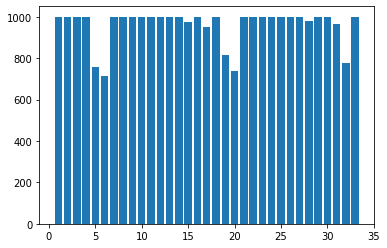

In [10]:
ind = np.concatenate([train, val, test])
d = dataset.get_dataset(files, index=ind, preload=False, n_channels=1, preprocess=transform_val)
counts = np.zeros(33)
for i in ind:
    l = d.labels[i]
    counts[l] +=1
plt.bar(np.arange(1, 34), np.array(counts).astype('int'))